In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**DECISION TREE**

In [11]:
#Mengimpor file
df = pd.read_csv("C:/Users/LENOVO/Downloads/adult_income_census.csv")
df.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K


In [12]:
#Menjadikan data kategorikal menjadi faktor
df['income_bracket'].replace({'<=50K':0, '>50K':1}, inplace=True)
df.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,0
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,0
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,0
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,0
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,0


In [13]:
#Menyiapkan data train dan data test
X = df.drop(['income_bracket'], axis=1)
X = pd.get_dummies(X)
Y = df['income_bracket']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

X.head()

,age,functional_weight,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,297847,5,3411,0,34,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,77,344425,5,0,0,10,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,131461,5,0,0,24,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,28,190350,5,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,37,171090,5,0,0,48,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
#Membuat model Tree
tree_class = DecisionTreeClassifier(random_state=42)
tree_class.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

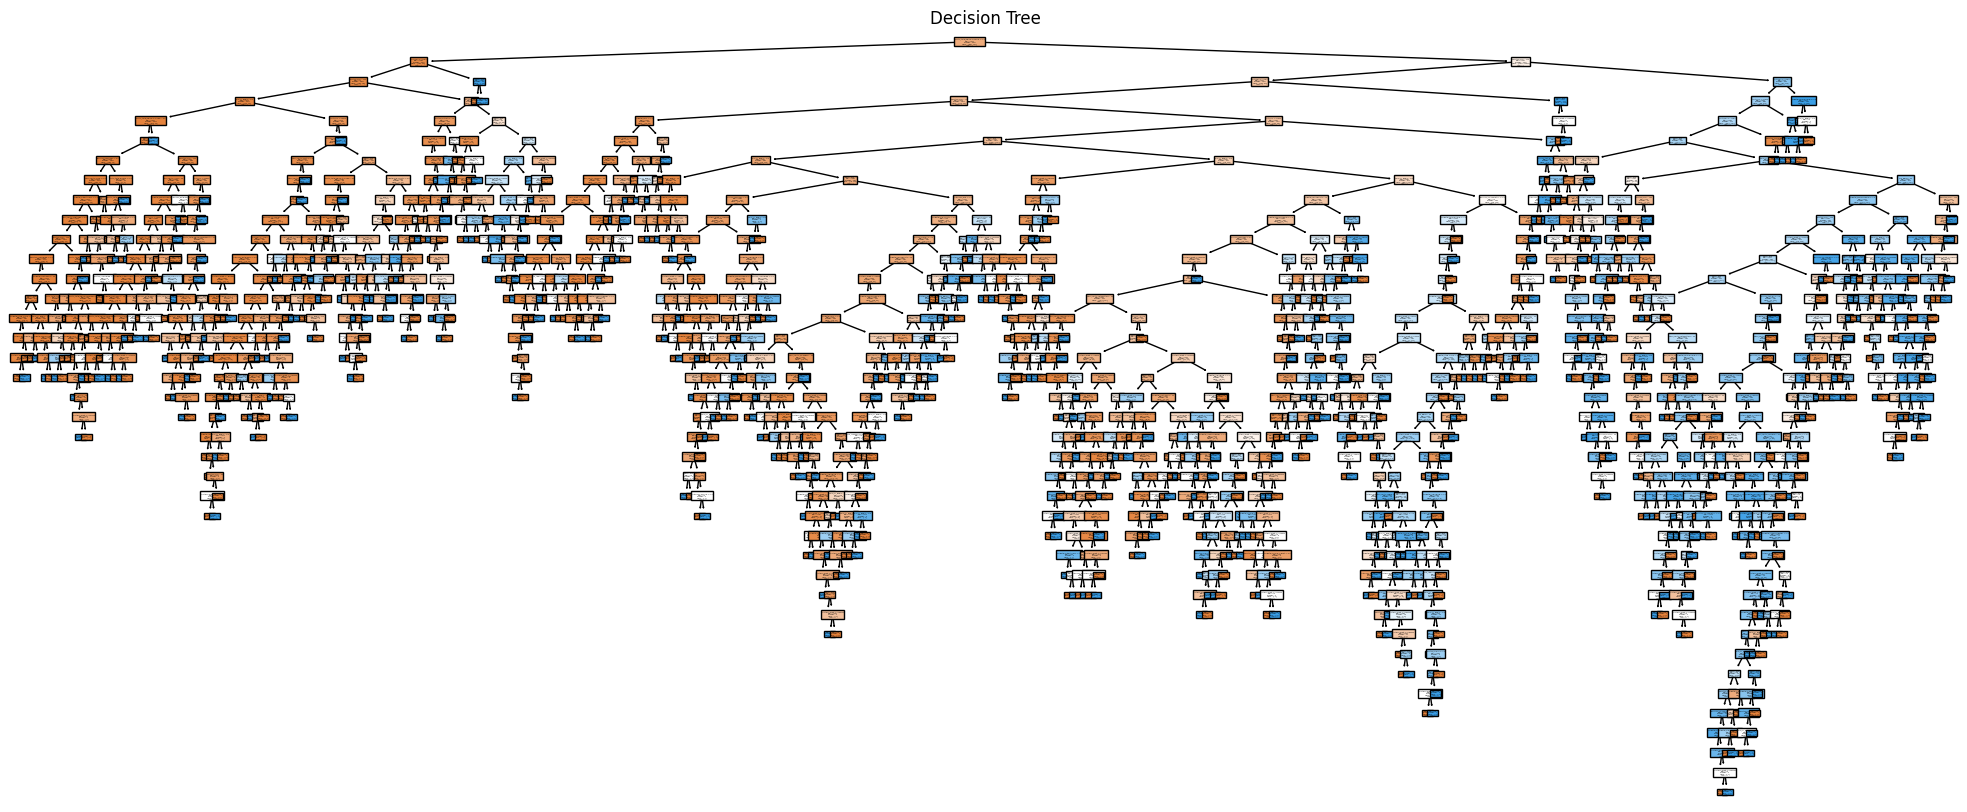

In [15]:
#Visualisasi Decision Tree
plt.figure(figsize=(25,10))
plot_tree(tree_class, feature_names=X.columns, class_names=['1', '0'], filled=True)
plt.title("Decision Tree")
plt.show()

In [16]:
#Menghitung akurasi model
train_accuracy = tree_class.score(x_train, y_train)
test_accuracy = tree_class.score(x_test, y_test)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 100.00%
Test Accuracy: 80.49%


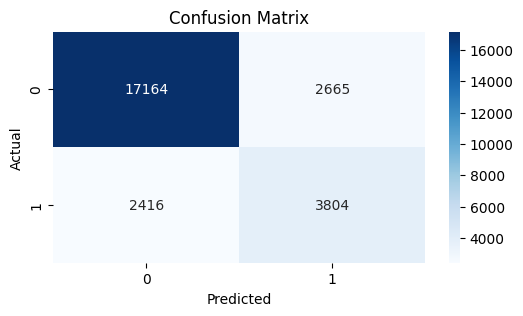

In [17]:
y_pred = tree_class.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()